Analizziamo i dati che abbiamo (avremmo dovuto) raccogliere con il nostro rivelatore.

L'idea era quella di misurare conteggi a diversi angoli per un determinato tempo, in modo tale da poter osservare una variazione compatibile con la legge che ci aspettiamo:

I = I0*cos^2(theta)

dove I è l'intensità data dal numero di conteggi diviso il tempo (N/T), I0 è l'intensità misurata all'angolo 0 rispetto alla verticale e theta è l'angolo di inclinazione del rivelatore.

I dati che analizzeremo sono stati presi con "Mazinga", una versione più grande del rivelatore costruito in laboratorio, costituito da tre piani sovrapposti. La "presa dati" è il tempo trascorso a contare le "accensioni" al passaggio di una particella per ogni angolo di
inclinazione del rivelatore, quindi abbiamo avuto un totale di nove prese dati (9 angoli).

In python bisogna "importare" i moduli contenenti le funzioni e gli oggetti che ci servono: nel nostro caso "numpy" per le operazioni aritmetiche e matplotlib per i grafici.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Di seguito alcune opzioni estetiche per i grafici che disegneremo.

In [2]:
plt.rcParams.update({
  'axes.linewidth': 2,
  'font.size': 16,
  'font.weight': 'bold',
  'xtick.major.size': 7,
  'xtick.major.width': 2,
  'xtick.minor.size': 4,
  'xtick.minor.width': 1.5,
  'ytick.major.size': 7,
  'ytick.major.width': 2,
  'ytick.minor.size': 4,
  'ytick.minor.width': 1.5
})

Qui inseriamo i valori numerici dell'angolo e del tempo di misura per le 9 prese dati (9 angoli, incrementando il valore di 5°).

In [3]:
theta = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85])
tempo = np.array([725, 414, 506, 433, 615, 621, 572, 452, 477])

Facciamo lo stesso con i conteggi per i tre piani, ovvero il numero di "accensioni" al passaggio di una particella

In [4]:
conteggi_N0 = np.array([20881, 7682, 9019, 7799, 11410, 17971, 9308, 6808, 5769])
conteggi_N1 = np.array([18995, 13713, 9759, 9791, 11897, 11955, 9422, 6387, 8334])
conteggi_N2 = np.array([32876, 19004, 16930, 13641, 13810, 14390, 6457, 8702, 4837])

Di seguito i conteggi delle coincidenze a coppie di piani, ovvero il numero di "accensioni" coincidenti temporalmente tra il primo piano ed il secondo (N01) e tra il primo piano ed il terzo (N02).

Infine prendiamo anche la coincidenza tra tutti e tre i piani (N012).

Domanda bonus: perché non scriviamo anche le coincidenze tra il secondo ed il terzo?

In [5]:
conteggi_N01 = np.array([11296, 6198, 6526, 5210, 6104, 4844, 3581, 2610, 2736])
conteggi_N02 = np.array([4523, 2385, 2582, 2024, 2296, 1539, 512, 148, 65])
conteggi_N012 = np.array([3818, 2075, 2242, 1750, 2022, 1336, 429, 106, 15])

Come esempio, prendiamo i conteggi del primo piano (N0), quelli della coincidenza tra il primo e secondo (N01) e quelli della tripla coincidenza (N012): calcoliamo l'intensità facendone il rapporto con il tempo di presa dati.

NOTA: numpy ci permette di scrivere semplicemente il rapporto tra due liste di numeri (array), ma quello che succede realmente è che ognuno dei 9 elementi della lista dei conteggi viene diviso per il corrispettivo elemento della lista del tempo.

In [6]:
Intensità_N0 = conteggi_N0/tempo
Intensità_N01 = conteggi_N01/tempo
Intensità_N012 = conteggi_N012/tempo

Calcoliamo in maniera simile gli errori.

Data la natura casuale ed indipendente della rivelazione di un raggio cosmico, quando si ha a che fare con conteggi di questo genere l'errore si calcola utilizzando la distribuzione di Poisson.

In breve, l'errore sui conteggi è dato dalla radice quadrata del numero stesso di conteggi.

In [7]:
err_Intensità_N0 = np.sqrt(conteggi_N0)/tempo
err_Intensità_N01 = np.sqrt(conteggi_N01)/tempo
err_Intensità_N012 = np.sqrt(conteggi_N012)/tempo

Diamo un'occhiata ai nostri dati, plottando l'intensità delle coincidenze N01 in funzione dell'angolo di inclinazione del rivelatore.

Per farlo creiamo una figura (fig1) e ci disegnamo degli assi (ax1). La funzione "errorbar" ci permette di disegnare i valori sulle Y con degli errori: noi ci metteremo quelli appena calcolari per N01. Infine scriviamo le quantità che abbiamo sugli assi X ed Y, ovvero angolo theta e intensità, specificando le unità di misura (gradi centigradi e Hertz rispettivamente).

Il grafico assomiglia al coseno al quadrato? Difficile dirlo... Ma possiamo fare di meglio.

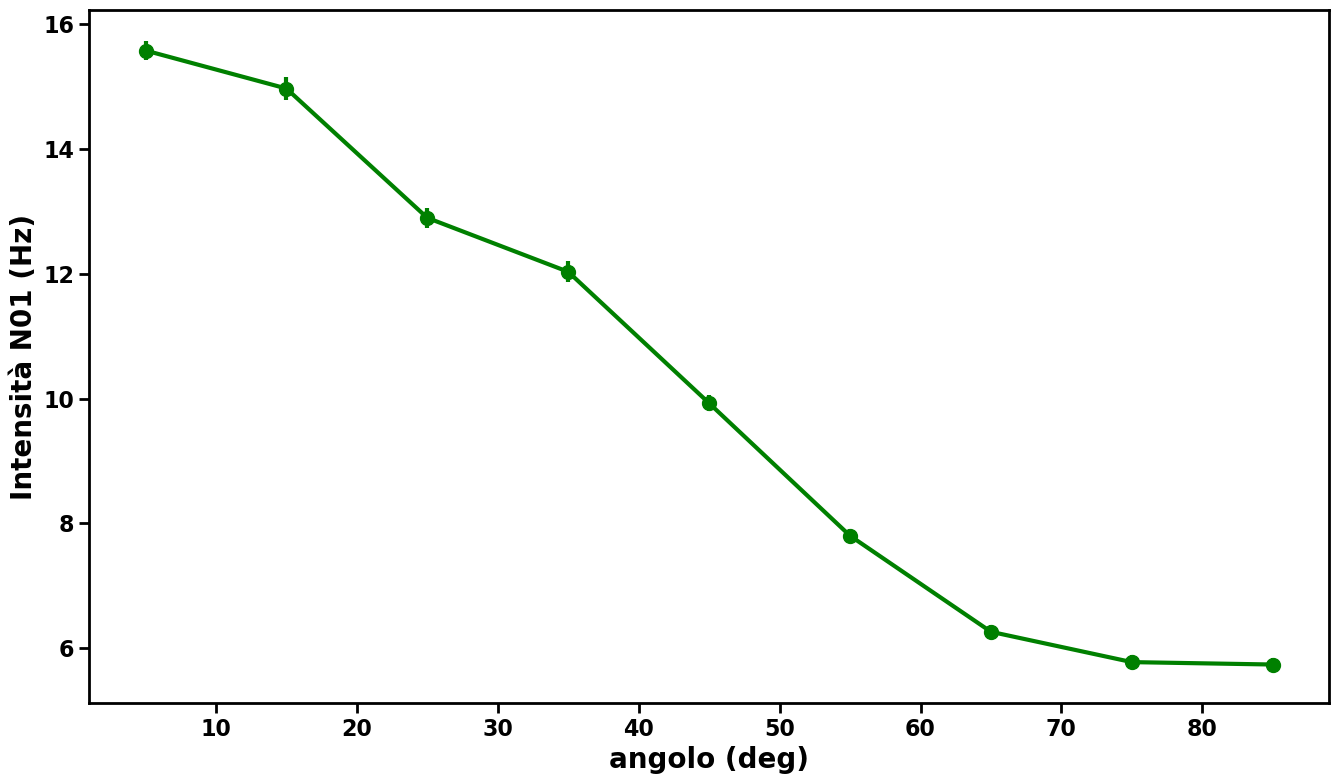

In [8]:
fig = plt.figure(figsize=[16, 9])
ax1 = plt.subplot()
ax1.errorbar(theta, Intensità_N01, yerr=err_Intensità_N01, lw=3, marker='o', ms=10, c='green')
ax1.set_xlabel('angolo (deg)', fontsize=20, weight='bold')
ax1.set_ylabel('Intensità N01 (Hz)', fontsize=20, weight='bold')
plt.show()

Per formulare una conlcusione più scientifica, possiamo disegnare la stessa intensità, questa volta direttamente in funzione del coseno al quadrato di theta.
In questo modo sarà più facile capire se i nostri dati rispettano la legge, visto che osserveremmo una relazione lineare (una retta).

Per farlo è sufficiente calcolare il quadrato del coseno di theta come segue.

In [9]:
cos_theta = np.cos(theta*np.pi/180)
cos2_theta = cos_theta*cos_theta

Un'ulteriore test che possiamo fare è il "fit" dei nostri dati con il modello che ci aspettiamo li descriva, ovvero l'equazione di una retta.

Ogni procedura di fit prevede un test che ne quantifichi la qualità, cioè quanto effettivamente i dati rispecchino il modello. Questo ci aiuterà a dare un peso alle nostre osservazioni.

in questo caso useremo il metodo dei "minimi quadrati" per il fit e il test del "chi quadro" per il risultato numerico.

Iniziamo col definire i pesi: Queste quantità ci aiuteranno a capire quali punti del grafico hanno una rilevanza maggiore: più è grande il peso, più il punto sarà importante ai fini del fit.
Di conseguenza possiamo definire i pesi come l'inverso dell'errore (al quadrato), dato che punti con errore più grande avranno un peso minore.

In [11]:
pesi = 1/err_Intensità_N01**2

A questo punto calcoliamo i coefficienti della retta che meglio descrive i nostri dati (coefficienti della retta Y = mX + q):

In [12]:
m, q = np.polyfit(cos2_theta, Intensità_N01, deg=1, w=pesi)

e i valori di y predetti dal fit, correispondenti alle x:

In [13]:
y_fit = m * cos2_theta + q

infine il chi2:

In [14]:
chi2 = np.sum(((Intensità_N01 - y_fit) / err_Intensità_N01)**2)

Di solito si riporta come risultato il chi2 ridotto, che si scrive:

In [16]:
gradi_di_libertà = 9-2
chi2_ridotto = chi2/gradi_di_libertà

Plottiamo quindi l'intensità in funzione di cos^2(theta) insieme alla retta ottenuta con il fit.

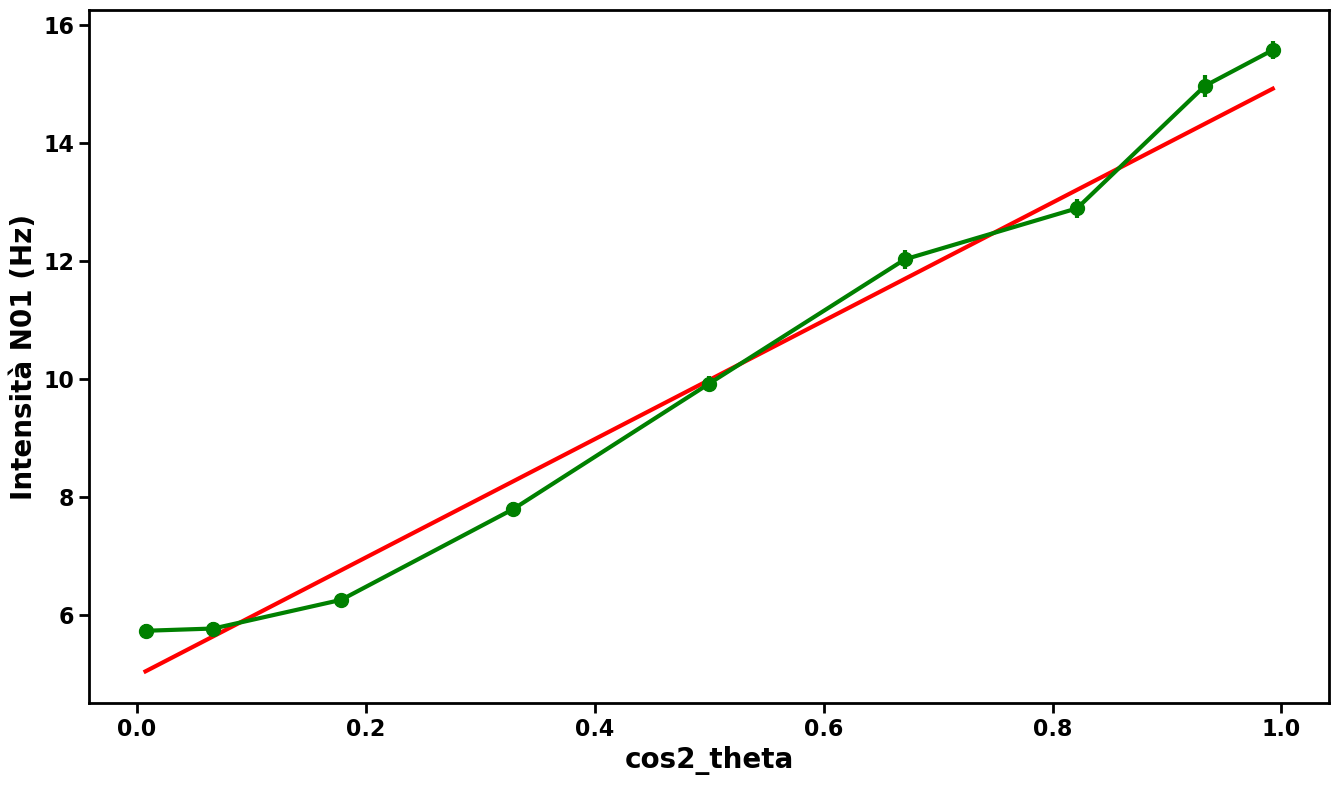

17.261589503391843


In [17]:
fig = plt.figure(figsize=[16, 9])
ax1 = plt.subplot()
ax1.errorbar(cos2_theta, Intensità_N01, yerr=err_Intensità_N01, lw=3, label='Dati', marker='o', ms=10, c='green')
ax1.plot(cos2_theta, y_fit, lw=3, label='Fit con retta', c='red')
ax1.set_xlabel('cos2_theta', fontsize=20, weight='bold')
ax1.set_ylabel('Intensità N01 (Hz)', fontsize=20, weight='bold')
plt.show()
print(chi2_ridotto)

